In [2]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 29.6 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import emoji
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO

In [16]:
# Emoji descriptions and corresponding emojis
emoji_meanings = {
    "blush smile": "😊",
    "sad": "😢",
    "heart": "❤️",
    "heart eyes": "😍",
    "embarrassed": "😅",
    "wink": "😉",
    "mad": "😡",
    "surprise": "😲",
    "laugh": "😂",
    "crying": "😭"
}

emojis =[" 😊 ", " 😢 ", " ❤️ ", " 😍 ", " 😅 ", " 😉 ", " 😡 ", " 😲 ", " 😂 ", " 😭 "]
#model.resize_token_embeddings(len(tokenizer))


In [5]:
# Load pre-trained BERT tokenizer and model
model = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModel.from_pretrained(model)
tokenizer.add_tokens(emojis)
model.resize_token_embeddings(len(tokenizer))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(30532, 768, padding_idx=0)

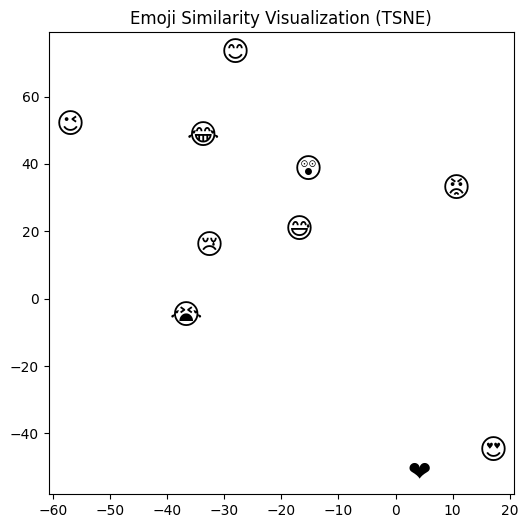

In [17]:
# Generate embeddings for the new tokens
def get_token_embedding(token):
    inputs = tokenizer(token, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Collect embeddings for all emoji meanings
embeddings = []
labels = []
for emoji, meaning in emoji_meanings.items():
    embedding = get_token_embedding(emoji)
    embeddings.append(embedding)
    labels.append(meaning)

# Convert embeddings to a numpy array
import numpy as np
embeddings = np.array(embeddings)

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
#embeddings_2d = pca.fit_transform(embeddings)
embeddings_2d = TSNE(n_components=2, random_state=12, perplexity=3).fit_transform(embeddings)
# Plot the emojis
plt.figure(figsize=(6, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0)
for i, label in enumerate(labels):
    x, y = embeddings_2d[i]
    #img = emoji_images[label].resize((40, 40))
    #plt.imshow(img, extent=(x - 0.2, x + 0.2, y - 0.2, y + 0.2), zorder=10)
    plt.text(x, y, label, fontsize=20, ha='center', va='center')
plt.title("Emoji Similarity Visualization (TSNE)", fontsize=12)
plt.axis("on")

plt.show()

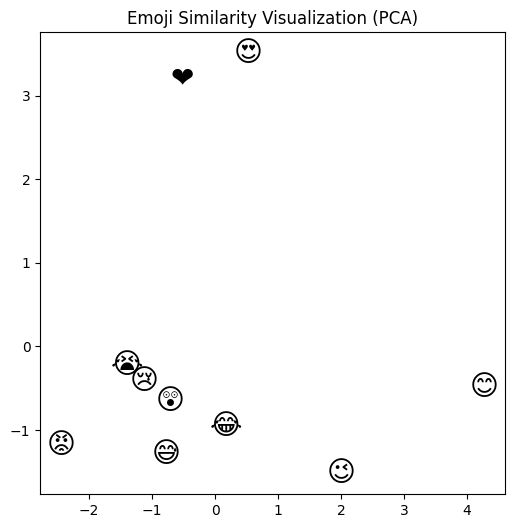

In [18]:
# Generate embeddings for the new tokens
def get_token_embedding(token):
    inputs = tokenizer(token, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Collect embeddings for all emoji meanings
embeddings = []
labels = []
for emoji, meaning in emoji_meanings.items():
    embedding = get_token_embedding(emoji)
    embeddings.append(embedding)
    labels.append(meaning)

# Convert embeddings to a numpy array
import numpy as np
embeddings = np.array(embeddings)

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)
#mbeddings_2d = TSNE(n_components=2, random_state=12, perplexity=3).fit_transform(embeddings)
# Plot the emojis
plt.figure(figsize=(6, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0)
for i, label in enumerate(labels):
    x, y = embeddings_2d[i]
    plt.text(x, y, label, fontsize=20, ha='center', va='center')
plt.title("Emoji Similarity Visualization (PCA)", fontsize=12)
plt.axis("on")

plt.show()